# Challenge 3

In [1]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [16]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [24]:
# your code here- numerical variable
numerical_variables = titanic.select_dtypes(include =[float, int])
numerical_variables


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [25]:
#your code here- categorical variable
categorical_variables = titanic.select_dtypes(include ='object')
categorical_variables


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [31]:
# your code here
sns.set_style('white')

#### Use the appropriate visulalization to show the distribution of the column `Age`

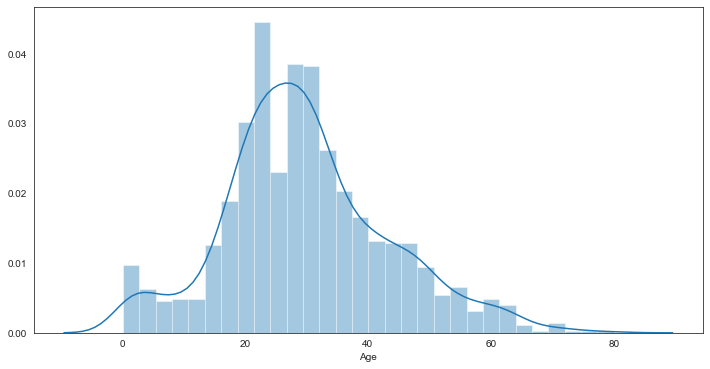

In [32]:
# your code here
plt.figure(figsize=(12,6))
sns.distplot(titanic.Age)


#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

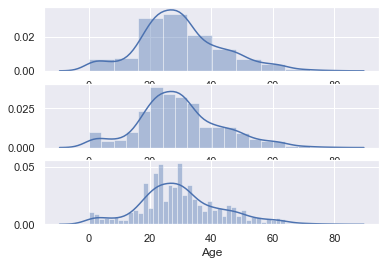

In [66]:
# your code here
sns.set()

fig, axis = plt.subplots(3)

sns.distplot(titanic.Age, bins = 10, ax = axis[0])
sns.distplot(titanic.Age, bins = 20, ax = axis[1])
sns.distplot(titanic.Age, bins = 50, ax = axis[2])

plt.show()

#### Whether the bin size affects your plot? Why?

Sí, se altera el width.

#### Use seaborn to show the distribution of the column `Age`

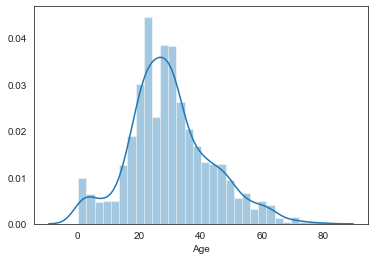

In [43]:
# your code here
sns.distplot(titanic.Age)


#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

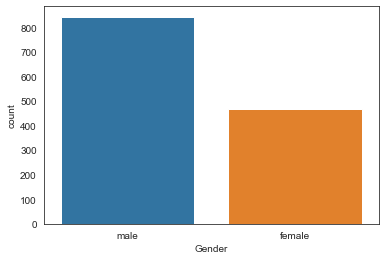

In [46]:
# your code here- 1st way
sns.countplot(titanic['Gender'])


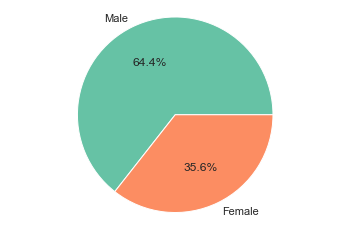

In [68]:
# your code here- 2nd way
labels = ['Male', 'Female']
gender_pie = titanic['Gender'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(gender_pie, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
ax1.axis('equal')
plt.show()

#### Use the appropriate plot to visualize the column `Pclass` 


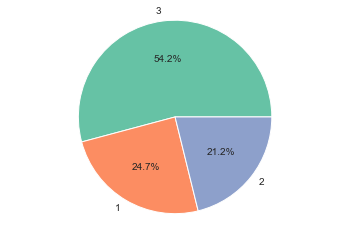

In [58]:
# your code here
labels = ['3', '1','2']
Pclass_pie = titanic['Pclass'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(Pclass_pie, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
ax1.axis('equal')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

{'whiskers': [<matplotlib.lines.Line2D at 0x121137950>,
 'caps': [<matplotlib.lines.Line2D at 0x121140b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1210fe5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x12114aa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1211504d0>],
 'means': [<matplotlib.lines.Line2D at 0x12114af90>]}

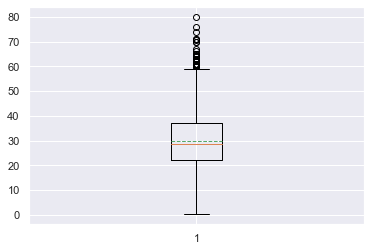

In [69]:
# your code here
plt.boxplot(titanic['Age'], meanline=True, showmeans=True)


#### What does the previous plot tell you about the feature `Age`? Comment.

# your comment here
La mayoría tenía entre 20 y 40 años.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

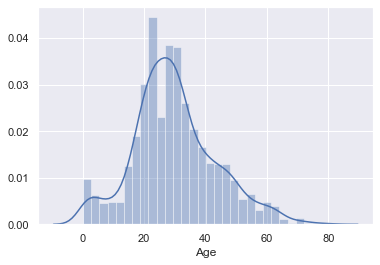

In [70]:
#your code here
sns.distplot(titanic['Age'])


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

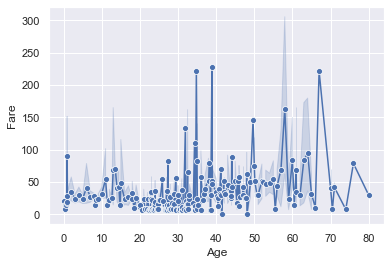

In [72]:
#your code-1st way
sns.lineplot(x=titanic.Age, y=titanic.Fare, marker='o')


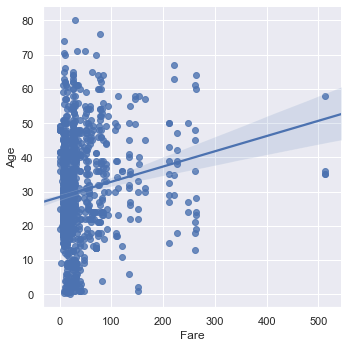

In [73]:
# your code-2nd way
sns.lmplot("Fare", "Age", data=titanic)


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

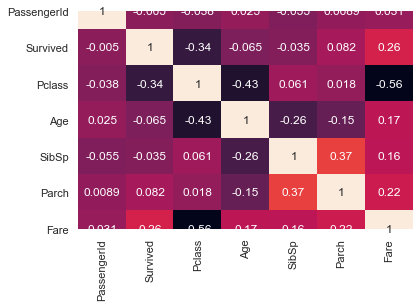

In [77]:
#your code here
sns.heatmap(titanic.corr(), annot=True, cbar=False)


#### According to the previous plot, what are the most correlated feature? Comment.

Los que tienen relación más fuerte son: Parch & SibSp

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

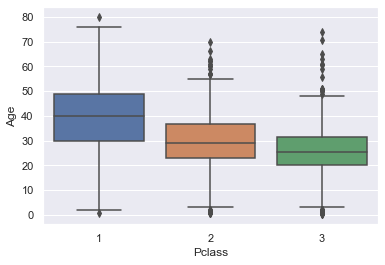

In [78]:
#your code here
sns.boxplot(x='Pclass', y='Age', data=titanic)


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

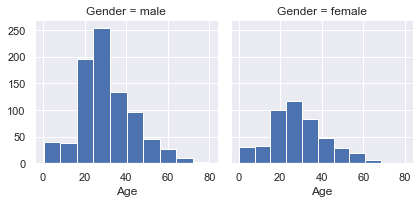

In [79]:
#your code here
age_gen = titanic[['Age', 'Gender']]
g = sns.FacetGrid(age_gen, col="Gender")
g.map(plt.hist, 'Age')